<a href="https://colab.research.google.com/github/Poojakamble24/Deep_Learning/blob/main/Handwritten_Digit_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Handwritten Digit Classification Project


In [1]:
from warnings import filterwarnings
filterwarnings("ignore")

### Load MNIST dataset


In [2]:
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
x_train.shape

(60000, 28, 28)

In [4]:
x_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [5]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

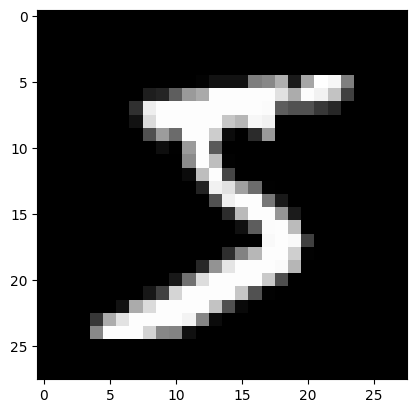

In [6]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0],cmap = "gray")

In [7]:
x_test.shape

(10000, 28, 28)

In [8]:
y_test.shape

(10000,)

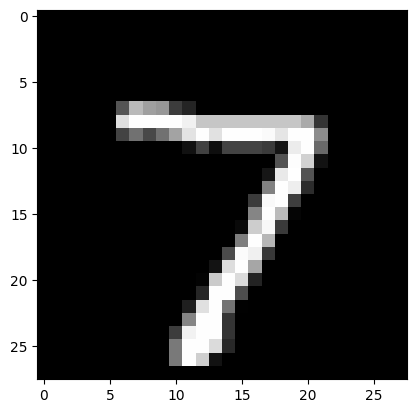

In [9]:
plt.imshow(x_test[0],cmap = "gray")

### Displaying first 9 images from train data


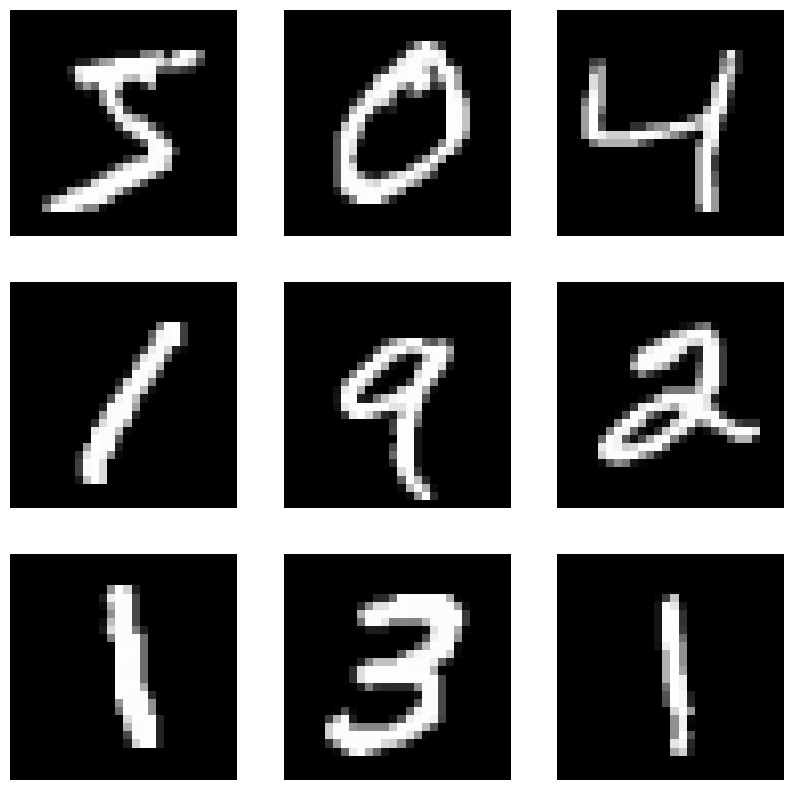

In [10]:


plt.figure(figsize = (10,10))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(x_train[i],cmap = "gray")
    plt.axis("off")

In [11]:
import numpy as np
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [12]:
len(np.unique(y_train))

10

### This is a multiclass classification problem
### Preprocess image data
### Pixel value 0-255



In [13]:
x_train_scl = x_train.astype ("float32")/255
x_test_scl = x_test.astype ("float32")/255
x_test_scaled = x_test/255

In [14]:
x_train_scl[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

 ### one hot encode the y features


In [15]:
from keras.utils import to_categorical
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

In [16]:
y_train[0:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [17]:
y_train_cat[0:5]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [18]:
y_test[0:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [19]:
y_test_cat[0:5]

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [20]:
x_train.shape

(60000, 28, 28)

In [21]:
y_train.shape

(60000,)

### Build the neural network

### Simple Covnet architecture


In [22]:
from keras.models import Sequential
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout



In [23]:
model = Sequential()

# added input layer
model.add(Input(shape = (28,28,1)))

# add convulation layer
model.add(Conv2D(filters = 32, kernel_size = (3,3),  activation = 'relu'))

# Add max poling1
model.add(MaxPooling2D(pool_size = (2,2)))

# add conculation layer
model.add(Conv2D(filters = 64, kernel_size = (3,3),  activation = 'relu'))

#  max poling2
model.add(MaxPooling2D(pool_size = (2,2)))

# add flatten layer
model.add(Flatten())

# add droup layer
model.add(Dropout (0.5))

# output layer
model.add(Dense(y_train_cat.shape[1],activation = 'softmax'))



In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dropout (Dropout)           (None, 1600)              0

In [25]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])


In [26]:
hist = model.fit(x_train_scl,y_train_cat,epochs = 15,validation_split = 0.1)


Epoch 1/15
1688/1688 [==============================] - 12s 4ms/step - loss: 0.2214 - accuracy: 0.9302 - val_loss: 0.0628 - val_accuracy: 0.9813
Epoch 2/15
1688/1688 [==============================] - 7s 4ms/step - loss: 0.0866 - accuracy: 0.9735 - val_loss: 0.0443 - val_accuracy: 0.9873
Epoch 3/15
1688/1688 [==============================] - 6s 4ms/step - loss: 0.0652 - accuracy: 0.9803 - val_loss: 0.0468 - val_accuracy: 0.9867
Epoch 4/15
1688/1688 [==============================] - 7s 4ms/step - loss: 0.0555 - accuracy: 0.9826 - val_loss: 0.0341 - val_accuracy: 0.9908
Epoch 5/15
1688/1688 [==============================] - 7s 4ms/step - loss: 0.0514 - accuracy: 0.9840 - val_loss: 0.0318 - val_accuracy: 0.9907
Epoch 6/15
1688/1688 [==============================] - 7s 4ms/step - loss: 0.0472 - accuracy: 0.9856 - val_loss: 0.0286 - val_accuracy: 0.9918
Epoch 7/15
1688/1688 [==============================] - 6s 4ms/step - loss: 0.0435 - accuracy: 0.9863 - val_loss: 0.0271 - val_accuracy

Plot the learning curve

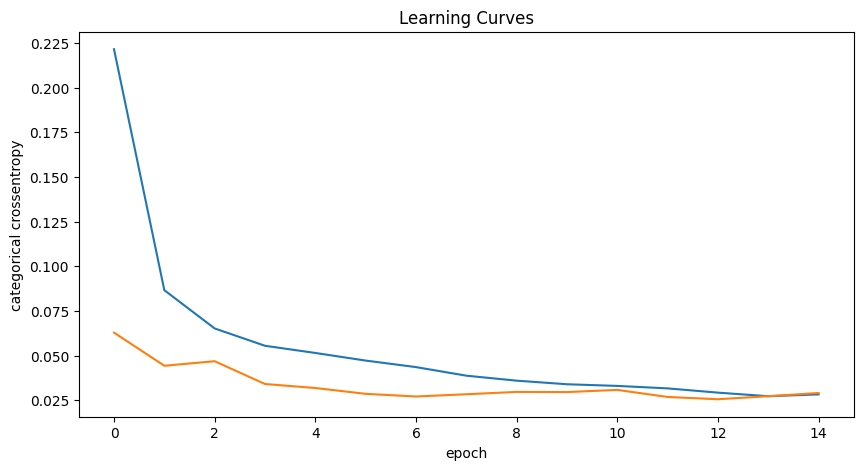

In [27]:
plt.figure(figsize=(10, 5))
plt.plot(hist.history['loss'], label='Train Loss')
plt.plot(hist.history['val_loss'], label='Validation Loss')
plt.title('Learning Curves')
plt.ylabel('categorical crossentropy')
plt.xlabel('epoch')
plt.show()

 ### Evaluate the model in train and test

In [28]:
model.evaluate(x_train_scl,y_train_cat)


1875/1875 [==============================] - 5s 3ms/step - loss: 0.0114 - accuracy: 0.9968


[0.011362108401954174, 0.9967666864395142]

In [29]:
model.evaluate(x_test_scl,y_test_cat)

313/313 [==============================] - 1s 3ms/step - loss: 0.0246 - accuracy: 0.9923


[0.024562763050198555, 0.9922999739646912]

### Predict results for train and test

In [30]:
yprob_train = model.predict(x_train_scl)
yprob_test = model.predict(x_test_scl)

313/313 [==============================] - 1s 2ms/step


In [31]:
yprob_train[0:5]

array([[1.5828146e-11, 1.5225817e-11, 1.3790148e-09, 2.1566653e-03,
        3.5151945e-14, 9.9784219e-01, 3.8916803e-13, 1.5210971e-09,
        6.6551223e-07, 4.2725165e-07],
       [9.9999976e-01, 5.8702665e-17, 1.5656325e-07, 2.5215281e-12,
        7.8314733e-12, 1.0349145e-11, 7.7964053e-08, 3.2015409e-13,
        1.4404525e-08, 8.3910985e-09],
       [2.4396440e-17, 1.3082508e-09, 6.9687385e-12, 3.1465057e-13,
        9.9999976e-01, 1.4277360e-12, 1.9341321e-14, 1.8940759e-07,
        2.6293325e-11, 1.1006606e-08],
       [3.1463269e-08, 9.9993861e-01, 4.0690147e-06, 2.7650787e-10,
        2.7235157e-05, 5.9416396e-09, 1.6742704e-06, 1.2111487e-05,
        1.6234637e-05, 1.2494803e-07],
       [2.6201155e-12, 1.1109693e-10, 3.0777700e-10, 5.0057030e-09,
        7.2004557e-05, 7.5446333e-10, 4.1537767e-13, 6.7586302e-07,
        9.2867704e-06, 9.9991798e-01]], dtype=float32)

In [32]:
import numpy as np
ypred_train = np.argmax(yprob_train,axis=1)
ypred_test = np.argmax(yprob_test,axis = 1)


In [33]:
yprob_train[0:5]

array([[1.5828146e-11, 1.5225817e-11, 1.3790148e-09, 2.1566653e-03,
        3.5151945e-14, 9.9784219e-01, 3.8916803e-13, 1.5210971e-09,
        6.6551223e-07, 4.2725165e-07],
       [9.9999976e-01, 5.8702665e-17, 1.5656325e-07, 2.5215281e-12,
        7.8314733e-12, 1.0349145e-11, 7.7964053e-08, 3.2015409e-13,
        1.4404525e-08, 8.3910985e-09],
       [2.4396440e-17, 1.3082508e-09, 6.9687385e-12, 3.1465057e-13,
        9.9999976e-01, 1.4277360e-12, 1.9341321e-14, 1.8940759e-07,
        2.6293325e-11, 1.1006606e-08],
       [3.1463269e-08, 9.9993861e-01, 4.0690147e-06, 2.7650787e-10,
        2.7235157e-05, 5.9416396e-09, 1.6742704e-06, 1.2111487e-05,
        1.6234637e-05, 1.2494803e-07],
       [2.6201155e-12, 1.1109693e-10, 3.0777700e-10, 5.0057030e-09,
        7.2004557e-05, 7.5446333e-10, 4.1537767e-13, 6.7586302e-07,
        9.2867704e-06, 9.9991798e-01]], dtype=float32)

In [34]:
y_train[0:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [35]:
y_test[0:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [36]:
yprob_test[0:5]

array([[3.33789829e-10, 1.47701973e-13, 6.32760657e-06, 1.07977549e-07,
        3.38932843e-15, 8.15294663e-13, 2.25181538e-18, 9.99993563e-01,
        2.24279417e-09, 3.46395019e-08],
       [2.45850762e-09, 1.15918395e-08, 1.00000000e+00, 3.91862202e-11,
        1.38644348e-12, 5.52866155e-15, 1.95246717e-08, 1.00614809e-13,
        6.34504715e-09, 7.67692811e-15],
       [2.27081898e-07, 9.99516964e-01, 2.49363461e-06, 1.72195112e-08,
        4.18590265e-04, 1.47100792e-07, 6.95119479e-06, 4.05065548e-05,
        1.38547739e-05, 2.38556964e-07],
       [9.99928832e-01, 9.72635533e-14, 1.27290205e-05, 7.80648612e-09,
        1.23637136e-07, 2.17144787e-07, 3.63190920e-05, 1.89546090e-09,
        2.11812421e-05, 4.84267161e-07],
       [2.45045737e-11, 1.19877164e-11, 3.66847053e-10, 8.87300563e-12,
        9.99937057e-01, 3.40183589e-12, 6.23651797e-10, 2.06983253e-09,
        6.15148510e-09, 6.29798233e-05]], dtype=float32)

### Plot the confusion matrix


     

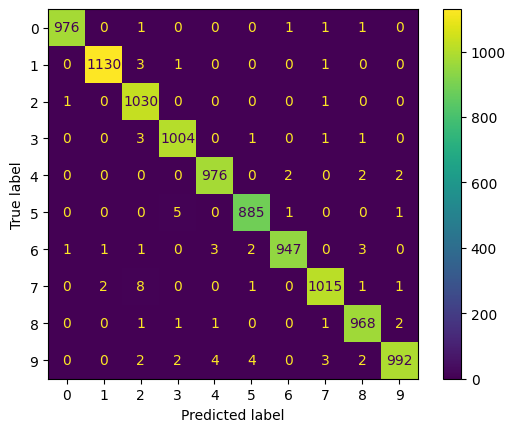

In [37]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test,ypred_test)


In [38]:
from sklearn.metrics import classification_report
print(classification_report(y_test,ypred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       980
           1       1.00      1.00      1.00      1135
           2       0.98      1.00      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       1.00      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.98      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



### Save above model for future use


In [39]:
model.save('digit_model.keras')

### Load above model


In [40]:
from keras.models import load_model
nn = load_model('/content/digit_model.keras')
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dropout (Dropout)           (None, 1600)              0

In [41]:
#loading the image
import cv2
img = cv2.imread('/content/example_img (1).jpg',cv2.IMREAD_GRAYSCALE)
img

array([[  1,   1,   0,   1,   0,   0,   2,   0,   2,   0,   0,   2,   0,
          0,   2,   1,   1,   0,   0,   0,   3,   0,   0,   1,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   3,   2,   0,   1,   0,   3,   3,   0,   0,
          0,   0,   0,   0,   4,   0,   2,   2,   0,   1,   0,   0,   0,
          0,   0],
       [  1,   2,   1,   1,   0,   0,   4,   0,   0,   0,   0,   0,   2,
          0,   0,   5,   2,   0,   0,   0,   0,   5,   3,   0,   0,   0,
          0,   0],
       [  0,   0,   1,   0,   2,   2,   0,   2,   0,   1,   1,   0,   0,
          1,   0,   0,   0,   6,   0,   2,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   1,   5,   0,  75, 224, 253, 254, 255, 252, 253, 255, 255,
        255, 255, 253, 254, 220, 105,   0,   4,   0,   0,   2,   0,   0,
          0,   0],
       [  2,   0,   0,   3, 221, 253, 255, 255, 255, 255, 255, 255, 253,
        254, 255, 255, 254, 255, 255, 255, 216, 125,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0, 123, 253, 255, 254, 254, 255, 253, 253, 255,
        255, 252, 253, 255, 255, 255, 254, 255, 254,   0,   1,   0,   0,
          0,   0],
       [  0,   2,   2,   0,   3,   1,   0,   2,   1,   1,   0,   2,   0,
          3,  96, 224, 254, 255, 254, 255, 254, 171,   2,   0,   0,   0,
          0,   0],
       [  1,   0,   2,   0,   0,   0,   0,   0,   0,   1,   0,   0,  95,
        223, 255, 253, 252, 255, 253, 255, 166,  11,   0,   1,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   2,   0,   0,   2,   0,   0, 132, 253,
        253, 255, 255, 255, 255, 165,   8,   4,   0,   0,   1,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   2,   0,   0,   0,  71, 222, 255, 248, 255,
        255, 253, 169,   8,   0,   0,   6,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  1,   0,   3,   1,   0,   3,   3,  69, 237, 255, 255, 254, 254,
        255, 224,  94,   2,   2,   0,   0,   2,   0,   2,   0,   0,   0,
          0,   0],
       [  1,   1,   0,   1,   1,   0,   0, 225, 254, 251, 255, 253, 255,
        255, 249, 255, 219,  96,   2,   0,   1,   0,   2,   0,   0,   0,
          0,   0],
       [  1,   0,   1,   0,   0,   2,   0, 120, 255, 254, 254, 253, 252,
        255, 255, 254, 255, 243, 103,   0,   0,   5,   0,   3,   0,   0,
          0,   0],
       [  0,   1,   0,   0,   2,   0,   1,   0,   1,   1,   0,   5,   3,
        118, 255, 253, 250, 255, 255, 221,  95,   0,   2,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   4,   0,   1,   0,   1,   0,   0,   3,   0,   3,
          0,   0, 121, 255, 255, 252, 255, 248,   0,   0,   1,   0,   0,
          0,   0],
       [  0,   0,   4,   0,   0,   1,   0,   1,   1,   1,   0,   0,   0,
          2,   0,   1,  10, 155, 255, 255, 250,   3,   1,   0,   0,   0,
          0,   0],
       [  1,   0,   0,   0,   2,   0,   1,   0,   0,   0,   2,   2,   0,
          0,   0,   0,   0,   2, 255, 254, 255,   0,   0,   4,   0,   0,
          0,   0],
       [  0,   3,   2,   0,   1,   2,   3,   0,   1,   0,   0,   1,   0,
          0,   3,   2,   2,   0, 254, 255, 254,   2,   2,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   6,   0,   0,   0,   1,   0,   2,   0,   2,   0,
          3,   0,   0,   0,   1, 254, 255, 252,   3,   0,   2,   0,   0,
          0,   0],
       [  4,   0,   2,   0,   0,   3,  75, 221, 223,  96,   0,   2,   0,
          0,   0,   6,   0, 125, 254, 255, 255,   0,   1,   0,   0,   0,
          0,   0],
       [  0,   5,   1,   0,   0,   1, 216, 255, 255, 243,  98,   0,   2,
          2,   0,  72, 224, 255, 255, 255, 166,   0,   4,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   5,   2,   1, 126, 253, 255, 254, 255, 255, 255,
        255, 255, 255, 255, 255, 253, 183,   9,   1,   0,   0,   0,   0,
          0,   0],
       [  3,   0,   3,   0,   2,   0,   3, 120, 255, 253, 255, 254, 254,
        253, 255, 253, 254, 255, 167,   8,   2,   0,   0,   2,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   

In [42]:
img_scl = img.astype('float32')/255


In [43]:
probs = model.predict(np.array([img_scl]))



1/1 [==============================] - 0s 164ms/step


In [44]:
probs

array([[9.61170139e-22, 4.82274318e-19, 1.22516980e-14, 9.99999642e-01,
        1.07639026e-20, 3.28347340e-07, 8.79479753e-21, 4.37227777e-15,
        3.88840131e-14, 2.26392884e-12]], dtype=float32)

In [45]:
pred = np.argmax(probs)
pred

3

In [46]:
prob = np.max(probs)
prob

0.99999964

In [47]:
def predict_number(path):
  img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
  plt.imshow(img, cmap='gray')
  plt.show()
  img_scl = img.astype('float32')/255
  probs = model.predict(np.array([img_scl]))
  pred = np.argmax(probs)
  prob = np.max(probs)
  return pred, prob






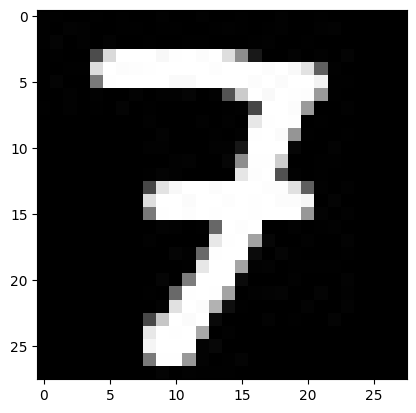

1/1 [==============================] - 0s 41ms/step


(7, 0.99989486)

In [48]:
predict_number('/content/example_img2 (1).jpg')

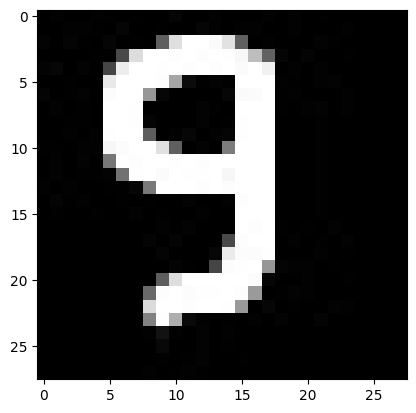

1/1 [==============================] - 0s 29ms/step


(9, 0.5033509)

In [49]:
predict_number('/content/example_img3 (1).jpg')